<a href="https://colab.research.google.com/github/EmanArafa66/Machine_Learning/blob/Boston_House_Prices_Linear_Regression/Boston_House_Prize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [6]:
# Load the Boston housing dataset from the original source
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

# Process the data as described
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Normalize the data using StandardScaler
data_normalized = normalize(data, axis=0)
target_normalized = normalize(target.reshape(-1, 1), axis=0)

print(data_normalized.shape)
print(target_normalized.shape)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data_normalized, target_normalized, test_size=0.2, random_state=42)

(506, 13)
(506, 1)


In [7]:
# Create linear regression object
model = linear_model.LinearRegression()

# Train the model using the training sets
model.fit(x_train, y_train)

LinearRegression()

In [8]:
# Make predictions using the testing set
y_pred = model.predict(x_test)

In [10]:
# Print coefficients
print(model.coef_)

# Evaluate the model
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

# Create higher-order polynomial features
x_poly = np.concatenate((data_normalized, data_normalized**2, data_normalized**3), axis=1)

[[-0.04330951  0.03207639  0.02169984  0.03009412 -0.40058256  1.15352316
  -0.0191775  -0.25817307  0.13930652 -0.19320929 -0.69905502  0.18686343
  -0.30357937]]
8.107137535028979e-05
0.6687594935356314


In [12]:
# Split the polynomial data into training and testing sets
x_train_poly, x_test_poly, y_train_poly, y_test_poly = train_test_split(x_poly, target_normalized, test_size=0.2, random_state=42)

print(x_poly.shape)

(506, 39)


In [13]:
# Train the model using the polynomial training sets
model.fit(x_train_poly, y_train_poly)

# Make predictions using the polynomial testing set
y_pred_poly = model.predict(x_test_poly)

# Evaluate the polynomial model
print(mean_squared_error(y_test_poly, y_pred_poly))
print(r2_score(y_test_poly, y_pred_poly))

4.457999336420004e-05
0.8178555684255697


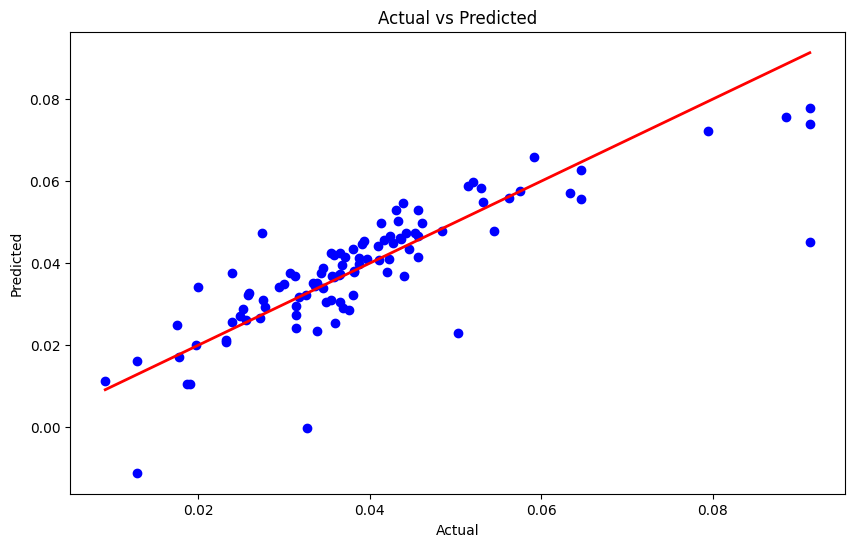

In [14]:
# Plot outputs
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()